In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector 
import awkward as ak
from utils import *
import bfit as bfm


## Examples

### Gaussian signal and Exponential background (synthetic data)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.18                      │             Nfcn = 1022              │
│ EDM = 8.33e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

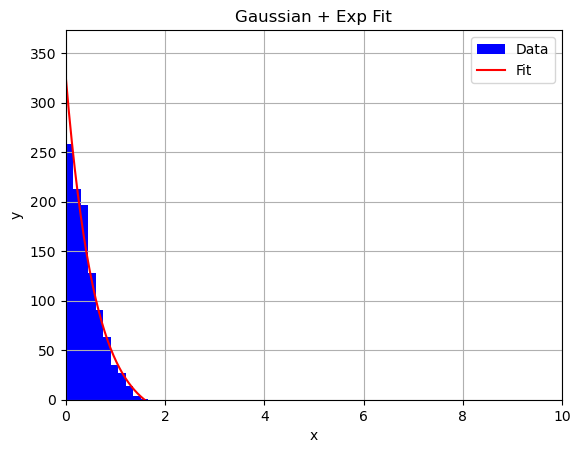

In [14]:
# Generate data 
x_values = np.linspace(0, 30, 2000)
# Calculate bin_width, x_min, x_max 
x_min = x_values[0]
x_max = x_values[-1]
bin_width = x_values[1] - x_values[0] 

# Create an instance of FitFunctions
fit_functions_instance = bfm.FitFunctions(bin_width, x_min, x_max)  


# Use the methods on the instance
signal = fit_functions_instance.gaussian(x_values, mu=5, sigma=1.2) 
background = fit_functions_instance.expA(x_values, A=15, b=0.3)
y = signal + background + np.random.normal(scale=0.5, size=x_values.shape) 

# Create the fitter
bins = np.linspace(0, 30, 200) 
nC = np.histogram(y, bins)[0]
fitter = bfm.Gaussian_plus_Exp(bins, nC)

# Fit the model
init_pars = [200, 5, 1.0, 10, 0.02, 0.1] 
param_names = ['n_s', 'mu', 'sigma', 'n_b', 'A', 'b']
fitter.fit(init_pars, param_names=param_names)
#print the imiuit table
print(fitter.fit_result)

# Plot the results
fitter.plot(title='Gaussian + Exp Fit', xlabel='x', ylabel='y', range=(0, 10)) 
plt.show()

### Gaussian signal and Linear background (synthetic data)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.256                      │             Nfcn = 1278              │
│ EDM = 0.000486 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

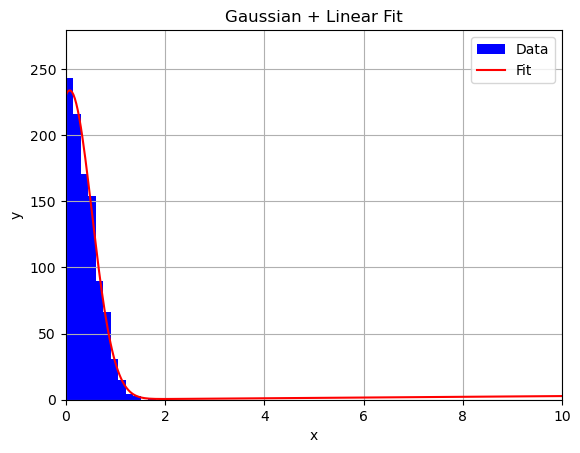

In [15]:
# Generate data 
x_values = np.linspace(0, 10, 2000)

# Calculate bin_width, x_min, x_max 
x_min = x_values[0]
x_max = x_values[-1]
bin_width = x_values[1] - x_values[0] 

# Create an instance of FitFunctions
fit_functions_instance = bfm.FitFunctions(bin_width, x_min, x_max)

# Use the methods on the instance for signal and linear background instead of expA
signal = fit_functions_instance.gaussian(x_values, mu=5, sigma=1.2)
background = fit_functions_instance.Linear(x_values, m=0.2, b=10)  # m for slope, b for intercept
np.random.seed(123) # use seemd for np.random
y = signal + background + np.random.normal(scale=0.5, size=x_values.shape)

# Create the fitter for Gaussian + Linear background
bins = np.linspace(0, 30, 200)
nC = np.histogram(y, bins)[0]
fitter = bfm.Gaussian_plus_Linear(bins, nC)  # This assumes a Gaussian_plus_Linear class exists
# Fit the model with initial parameters suitable for a Gaussian + Linear background
init_pars = [2000, 5, 1.0, 10, 0.02, 0.01]  # Last two parameters for the linear background (m, b)
param_names = ['n_s', 'mu', 'sigma', 'n_b', 'm', 'b']
fitter.fit(init_pars, param_names=param_names)
#print the imiuit table
fitter.summary()

# Plot the results with a specified range to focus on the region of interest
fitter.plot(title='Gaussian + Linear Fit', xlabel='x', ylabel='y', range=(0, 10))
plt.show()

### Read Example from B four decay Data

In [2]:
base_path = '/data/home/melashri/BPhysics/Analysis/data/'
channel = 'B2L0barPKpKm'
magnet_polarities = ['MagDown', 'MagUp']
decay_modes = ['LL', 'DD']

file_paths = [base_path + channel + f'/{channel}_2016_{magnet}_{decay}.root' 
              for magnet in magnet_polarities for decay in decay_modes]

arrs = uproot.concatenate([file_path + ':DecayTree;1' for file_path in file_paths])

In [3]:
p_ProbNNp    = arrs['p_ProbNNp']

L0_MM  = arrs['L0_MM']
Bu_MM  = arrs['Bu_MM']
Bu_FDCHI2_OWNPV   = arrs['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X    = arrs["L0_ENDVERTEX_X"]
L0_ENDVERTEX_Y    = arrs["L0_ENDVERTEX_Y"]
L0_ENDVERTEX_Z    = arrs["L0_ENDVERTEX_Z"]
L0_ENDVERTEX_XERR = arrs["L0_ENDVERTEX_XERR"]
L0_ENDVERTEX_YERR = arrs["L0_ENDVERTEX_YERR"]
L0_ENDVERTEX_ZERR = arrs["L0_ENDVERTEX_ZERR"]
L0_OWNPV_Z = arrs["L0_OWNPV_Z"]
L0_OWNPV_ZERR = arrs["L0_OWNPV_ZERR"]

L0_FD_OWNPV = arrs["L0_FD_OWNPV"]
L0_FDCHI2_OWNPV = arrs["L0_FDCHI2_OWNPV"]
Bu_ENDVERTEX_X     = arrs["Bu_ENDVERTEX_X"]
Bu_ENDVERTEX_Y     = arrs["Bu_ENDVERTEX_Y"]
Bu_ENDVERTEX_Z     = arrs["Bu_ENDVERTEX_Z"]
Bu_ENDVERTEX_XERR  = arrs["Bu_ENDVERTEX_XERR"]
Bu_ENDVERTEX_YERR  = arrs["Bu_ENDVERTEX_YERR"]
Bu_ENDVERTEX_ZERR  = arrs["Bu_ENDVERTEX_YERR"]
Bu_IPCHI2_OWNPV    = arrs["Bu_IPCHI2_OWNPV"]
Bu_MM              = arrs['Bu_MM']
Bu_MMERR           = arrs['Bu_MMERR']
Bu_ID              = arrs['Bu_ID']
Bu_P               = arrs['Bu_P']
Bu_PT              = arrs['Bu_PT']
Bu_PE              = arrs['Bu_PE']
Bu_PX              = arrs['Bu_PX']
Bu_PY              = arrs['Bu_PY']
Bu_PZ              = arrs['Bu_PZ']
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y

Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR))
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR))
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR))

delta_x = np.divide(Delta_X,Delta_X_ERR)
delta_y = np.divide(Delta_Y,Delta_Y_ERR)
delta_z = np.divide(Delta_Z,Delta_Z_ERR)
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z)
h2_probNNk = arrs['h2_ProbNNk'] # Probability of the second hadron being a k    aon according to the neural network
h1_probNNk = arrs['h1_ProbNNk'] # Probability of the first hadron being a kaon according to the neural network
prodProbKK = np.multiply(h1_probNNk, h2_probNNk) # Product of the two probabilities



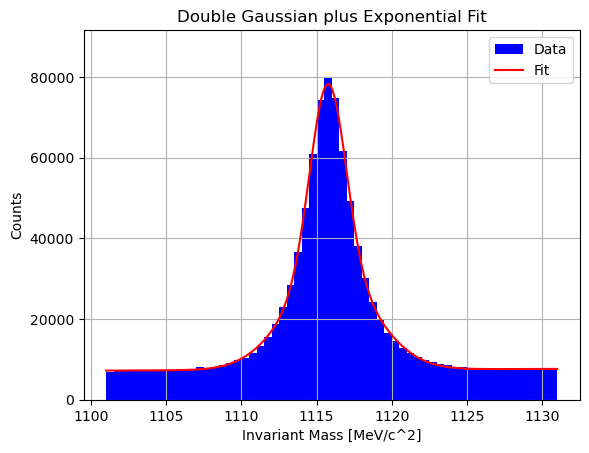

Fitted parameters: <ValueView n_s=619233.7593139414 f=0.45356830964215816 n_b=445452.8775568793 mu1=1115.7547232446461 mu2=1115.8945674780505 sigma1=1.1845649549532673 sigma2=-2.870021472751211 A=0.039049708331673136 b=-0.0019132192542310408>
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 548.6                      │              Nfcn = 736              │
│ EDM = 6.8e-05 (Goal: 0.0002)     │            time = 2.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼─────────────────────────────────────

In [12]:
# Histogram the selected data
bins = 60
range_selection = (1101, 1131)
hist_counts, bin_edges = np.histogram(L0_MM, bins=bins, range=range_selection)

# Initial parameters for DoubleGaussian_plus_Exp
init_pars = [614146.7127341548, 0.5117360960794225, 75035.06304016376,
             1115.7621727020119, 1116.0406198712506, 1.2337688543001413,
             -2.9775755164716835, 0.03905027308220312, -0.007453708452496413]
param_names = ['n_s', 'f', 'n_b', 'mu1', 'mu2', 'sigma1', 'sigma2', 'A', 'b']
# Limits for Minuit fit
#minuit_limits = {"f": (0.0001, 0.9999)}

# Create the fit model using the DoubleGaussian_plus_Exp class
fit_model = bfm.DoubleGaussian_plus_Exp(bin_edges, hist_counts)

# Perform the fit
fit_result = fit_model.fit(init_pars, param_names)

# Optionally, you can plot the fit result to visualize how well the model fits the data
fig, ax = fit_model.plot(title='Double Gaussian plus Exponential Fit', 
                         xlabel='Invariant Mass [MeV/c^2]', ylabel='Counts')

# Print the fitted parameters
print("Fitted parameters:", fit_result.values)

#print the imiuit table
fit_model.summary()

# If you need access to other fit details, you can directly use the `fit_result` object
# For example, to get the chi-squared value of the fit
chi_squared = fit_result.fval
print("Chi-squared:", chi_squared)

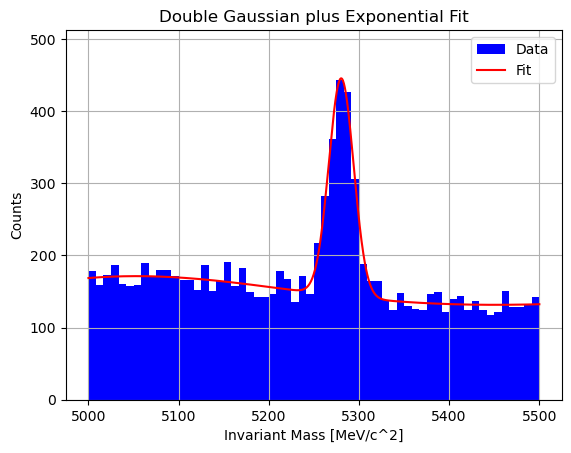

Fitted parameters: <ValueView n_s=5712.970599742552 f=0.21878468741449483 n_b=6619.6903785822415 mu1=5280.327391263663 mu2=5021.262014272658 sigma1=13.76459072134927 sigma2=197.4250359403319 A=-0.01364065441898456 b=-0.0006238529404102761>
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 60.57                      │              Nfcn = 769              │
│ EDM = 9.06e-06 (Goal: 0.0002)    │            time = 2.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤


In [13]:
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Lambda_chisq_100
tight_cuts =  good_Lambda_sep_100 & (Bu_PT>3500) & (prodProbKK>0.5) & (p_ProbNNp>0.5) & (Bu_FDCHI2_OWNPV>250.) & (Bu_IPCHI2_OWNPV<6)

# Histogram the selected data
bins = 60
range_selection = (5000, 5500)
hist_counts, bin_edges = np.histogram(Bu_MM[tight_cuts], bins=bins, range=range_selection)

# Initial parameters for DoubleGaussian_plus_Exp
init_pars = [1711.2289517158792, 0.8657374336001094, 413.09550437813255, 5310.770001362862,
             5318.110058680326, 43.880459657086504, 47.939884368516395, -0.013640654461977111, 0.12543285071181343]
param_names = ['n_s', 'f', 'n_b', 'mu1', 'mu2', 'sigma1', 'sigma2', 'A', 'b']

# Limits for Minuit fit
#minuit_limits = {"f": (0.0001, 0.9999)}

# Create the fit model using the DoubleGaussian_plus_Exp class
fit_model = bfm.DoubleGaussian_plus_Exp(bin_edges, hist_counts)

# Perform the fit
fit_result = fit_model.fit(init_pars, param_names)

# Optionally, you can plot the fit result to visualize how well the model fits the data
fig, ax = fit_model.plot(title='Double Gaussian plus Exponential Fit', 
                         xlabel='Invariant Mass [MeV/c^2]', ylabel='Counts')

# Print the fitted parameters
print("Fitted parameters:", fit_result.values)

#print the imiuit table
fit_model.summary()


# If you need access to other fit details, you can directly use the `fit_result` object
# For example, to get the chi-squared value of the fit
chi_squared = fit_result.fval
print("Chi-squared:", chi_squared)

### Double Gaussian signal and Expanontial Background (Synthetic Data)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 471.5                      │              Nfcn = 835              │
│ EDM = 7.76e+03 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

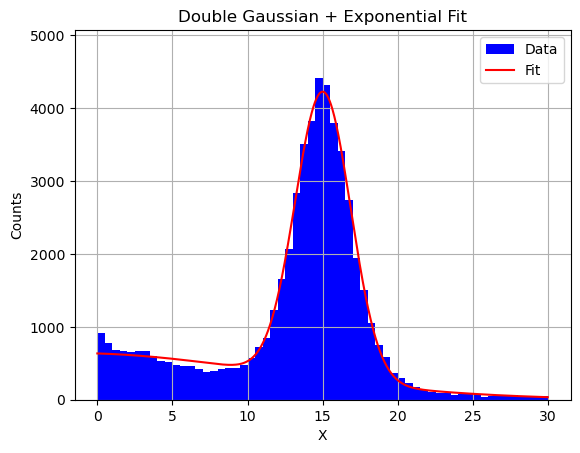

In [33]:
# Synthesizing the dataset
np.random.seed(0)  # For reproducibility

x_values = np.linspace(0, 30, 1000)  # x-axis
true_mu = 15  # Center of Gaussians
true_sigma1, true_sigma2 = 1.5, 2.5  # Widths of Gaussians
true_n_s1, true_n_s2 = 150, 100  # Heights (amplitudes) of Gaussians
true_n_b = 50  # Background coefficient
true_A, true_b = 0.2, 5  # Slope and intercept for exponential background

# Generate Gaussian signals
signal1 = true_n_s1 * np.exp(-(x_values - true_mu)**2 / (2 * true_sigma1**2))
signal2 = true_n_s2 * np.exp(-(x_values - true_mu)**2 / (2 * true_sigma2**2))

# Generate exponential background
background = true_n_b * np.exp(-x_values / 10)



# Combine signal and background, then add some noise
y_values = signal1 + signal2 + background
y_values += np.random.normal(0, np.sqrt(y_values), size=y_values.shape)

# Histogram the data to simulate binning
bins = np.linspace(0, 30, 61)  # 60 bins
nC, _ = np.histogram(x_values, bins=bins, weights=y_values)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

fit_functions_instance = bfm.FitFunctions(1, 0, 30)  # Assuming bin width of 1 for simplicity
fitter = bfm.DoubleGaussian_plus_Exp(bins, nC)

# Initial guesses for the parameters
init_pars = [true_n_s1, 0.5, true_n_b, true_mu, true_mu, true_sigma1, true_sigma2, true_A, true_b]
param_names = ['n_s', 'f', 'n_b', 'mu1', 'mu2', 'sigma1', 'sigma2', 'A', 'b']

# Fit the data
fitter.fit(init_pars, param_names=param_names)

# Print fit summary
fitter.summary()

# Plot the fitted model alongside the data
fitter.plot(title='Double Gaussian + Exponential Fit', xlabel='X', ylabel='Counts')
plt.show()